# Reduced matrix elements and B(E1) strengths

## 1.  $SU(3)$ one-body reduced matrix elements acting on a single shell

<ul>
<li>Expansion of the complete matrix element and application of Wigner-Eckart theorem. Notice that the Wigner-Eckart theorem convention is not to put any $1/\sqrt{2L+1}$ coefficients. 

$$\Big\langle[f'](\lambda'\mu'),K',L',M_{L'},S',M_{S'}\Big|\big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)K_0L_0S_0}_{\hspace{17mm}M_{L_0}M_{S_0}}\Big|[f](\lambda\mu),K,L,M_{L},S,M_{S}\Big\rangle \\\\= \sum_{l,l',m_l,m_{l'},m_s,m{_s'}}\langle(\eta0)0l';(0\eta)0l||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle l'm_{l'}lm_l|L_0M_{L_0}\rangle \langle\frac{1}{2}m_{s'}\frac{1}{2}m_{s}|S_0M_{S_0}\rangle \\ \times \Big\langle[f'](\lambda'\mu'),K',L',M_{L'},S',M_{S'}\Big|a^{\dagger}_{(\eta0)l'm_{l'}\frac{1}{2}m_{s'}}\tilde{a}_{(0\eta)lm_l\frac{1}{2}m_s}\Big|[f](\lambda\mu),K,L,M_{L},S,M_{S}\Big\rangle \\ = \sum_{l,l',m_l,m_{l'},m_s,m_{s'}}\langle(\eta0)0l';(0\eta)0l||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle l'm_{l'}lm_l|L_0M_{L_0}\rangle \langle\frac{1}{2}m_{s'}\frac{1}{2}m_{s}|S_0M_{S_0}\rangle \\ \times \sum_{[f''](\lambda''\mu'')K''L''M_{L''}S''M_{S''}}    \Big\langle[f'](\lambda'\mu'),K',L',M_{L'},S',M_{S'}\Big|a^{\dagger}_{(\eta0)l'm_{l'}\frac{1}{2}m_{s'}}\Big|[f''](\lambda''\mu''),K'',L'',M_{L''},S'',M_{S''}\Big\rangle \\ \hspace{40mm}\times\Big\langle[f''](\lambda''\mu''),K'',L'',M_{L''},S'',M_{S''}\Big|\tilde{a}_{(0\eta)lm_l\frac{1}{2}m_s}\Big|[f](\lambda\mu),K,L,M_{L},S,M_{S}\Big\rangle \\ = \sum_{l,l',m_l,m_{l'},m_s,m_{s'}}\langle(\eta0)0l';(0\eta)0l||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle l'm_{l'}lm_l|L_0M_{L_0}\rangle \langle\frac{1}{2}m_{s'}\frac{1}{2}m_{s}|S_0M_{S_0}\rangle \\ \times \sum_{[f''](\lambda''\mu'')K''L''M_{L''}S''M_{S''}}
\Bigg(\langle(\lambda''\mu'')K''L'';(\eta0)0l' ||(\lambda'\mu')K'L'\rangle_{\rho_1=1}\langle L''M_{L''}l'm_{l'}|L'M_{L'}\rangle
\langle S''M_{S''}\frac{1}{2}m_{s'}|S'M_{S'}\rangle\\ \times
\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1} \Bigg) \\
\Bigg(\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho_2=1} \langle LM_{L}lm_{l}|L''M_{L''}\rangle
\langle SM_{S}\frac{1}{2}m_{s}|S''M_{S''}\rangle
\Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho_2=1} \Bigg) 
$$



<li>Apply Wigner-Eckart theorem on the left hand side and reorganize the right hand side of the equality.

$$\sum_{\rho} \langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\rho}
\langle LM_{L}L_oM_{L_o}|L'M_{L'}\rangle
\langle SM_{S}S_oM_{S_o}|S'M_{S'}\rangle
\\\hspace{60mm}\times\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho}\\\\
= \sum_{ll'(\lambda''\mu'')K''L''S''}
\langle(\eta0)0l';(0\eta)0l||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle(\lambda''\mu'')K''L'';(\eta0)0l' ||(\lambda'\mu')K'L'\rangle_{\rho_1=1}\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho_2=1}
\\\times\sum_{m_l,m_{l'},M_{L''}}
\langle LM_{L}lm_{l}|L''M_{L''}\rangle
\langle l'm_{l'}lm_l|L_0M_{L_0}\rangle
\langle L''M_{L''}l'm_{l'}|L'M_{L'}\rangle
\\\times\sum_{m_s,m_{s'},M_{S''}}
\langle SM_{S}\frac{1}{2}m_{s}|S''M_{S''}\rangle
\langle\frac{1}{2}m_{s'}\frac{1}{2}m_{s}|S_0M_{S_0}\rangle
\langle S''M_{S''}\frac{1}{2}m_{s'}|S'M_{S'}\rangle
\\\times\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}\Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho_2=1}
$$





<li>Multiply by $\sum_{M_L,M_{L_o}}\langle LM_{L}L_oM_{L_o}|L'M_{L'}\rangle$ and $\sum_{M_S,M_{S_o}}\langle SM_{S}S_oM_{S_o}|S'M_{S'}\rangle$. Apply orthogonality on the left hand side. Apply symmetry properties $\langle l'm_{l'}lm_l|L_0M_{L_0}\rangle = (-1)^{l+l'-L_o}\langle lm_ll'm_{l'}|L_0M_{L_0}\rangle$ and $\langle\frac{1}{2}m_{s'}\frac{1}{2}m_{s}|S_0M_{S_0}\rangle= (-1)^{1-S_o}\langle\frac{1}{2}m_{s}\frac{1}{2}m_{s'}|S_0M_{S_0}\rangle$.


$$\sum_{\rho} \langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\rho}\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho}\\\\ = \sum_{ll'(\lambda''\mu'')K''L''S''}
\langle(\eta0)0l';(0\eta)0l||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle(\lambda''\mu'')K''L'';(\eta0)0l' ||(\lambda'\mu')K'L'\rangle_{\rho_1=1}\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho_2=1}
\\ \times \sum_{m_l,m_{l'},M_{L''},M_{L_o},M_L}
(-1)^{l+l'-L_o}\langle LM_{L}lm_{l}|L''M_{L''}\rangle
\langle lm_ll'm_{l'}|L_0M_{L_0}\rangle
\langle L''M_{L''}l'm_{l'}|L'M_{L'}\rangle\langle LM_{L}L_oM_{L_o}|L'M_{L'}\rangle
\\ \times \sum_{m_s,m_{s'},M_{S''},M_{S_o},M_S}
(-1)^{1-S_o}\langle SM_{S}\frac{1}{2}m_{s}|S''M_{S''}\rangle
\langle\frac{1}{2}m_{s}\frac{1}{2}m_{s'}|S_0M_{S_0}\rangle
\langle S''M_{S''}\frac{1}{2}m_{s'}|S'M_{S'}\rangle\langle SM_{S}S_oM_{S_o}|S'M_{S'}\rangle
\\\times\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}\Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho_2=1}
$$

<li>Group the Clebsch-Gordan coefficients in the $U(j_1,j_2,j,j_3;j_{12},j_{23})$ coefficient.


$$\sum_{\rho} \langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\rho}\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho}\\\\ = \sum_{ll'(\lambda''\mu'')K''L''S''}
\langle(\eta0)0l';(0\eta)0l||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle(\lambda''\mu'')K''L'';(\eta0)0l' ||(\lambda'\mu')K'L'\rangle_{\rho_1=1}\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho_2=1}
\\ \times (-1)^{l+l'-L_o-S_o+1}U(L,l,L',l';L'',L_o)U(S,1/2,S',1/2;S'',S_o)
\\\times\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}\Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho_2=1}
$$



<li>Multiply by $\sum_{K,L,K_o,L_o} \langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\rho}$ and apply $SU(3)$ orthogonality relations in the left hand side.


$$\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho}\\\\
= \sum_{l,l',[f''],(\lambda''\mu''),K'',L'',S'',K,L,K_o,L_o}
\langle(\eta0)0l';(0\eta)0l||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle(\lambda''\mu'')K''L'';(\eta0)0l' ||(\lambda'\mu')K'L'\rangle_{\rho_1=1}\\\hspace{50mm}\times\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho_2=1}\langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\rho}
\\ \times (-1)^{l+l'-L_o-S_o+1}U(L,l,L',l';L'',L_o)U(S,1/2,S',1/2;S'',S_o)
\\\times\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}\Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho_2=1}
$$



<li>Apply $SU(3)$ symmetry relations on $\langle(\eta0)0l';(0\eta)0l||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1} = (-1)^{\eta+\eta-\lambda_o-\mu_o+l'+l-L_o}\langle(0\eta)0l;(\eta0)0l'||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}$

$$\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho}\\\\
= \sum_{l,l',[f''],(\lambda''\mu''),K'',L'',S'',K,L,K_o,L_o}
\langle(0\eta)0l;(\eta0)0l'||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle(\lambda''\mu'')K''L'';(\eta0)0l' ||(\lambda'\mu')K'L'\rangle_{\rho_1=1}\\\hspace{50mm}\times\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho_2=1}\langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\rho}
\\ \times (-1)^{-S_o+1+\eta-\lambda_o+\eta-\mu_o}U(L,l,L',l';L'',L_o)U(S,1/2,S',1/2;S'',S_o)
\\\times\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}\Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho_2=1}
$$
    


<li> Relate $\Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho_2=1}$ to $\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}$
    
$$\Big\langle[f''](\lambda''\mu''),K'',L'',M_{L''},S'',M_{S''}\Big|\tilde{a}_{(0\eta)lm_l\frac{1}{2}m_s}\Big|[f](\lambda\mu),K,L,M_{L},S,M_{S}\Big\rangle\\
=\langle LM_{L}lm_{l}|L''M_{L''}\rangle
\langle SM_{S}\frac{1}{2}m_{s}|S''M_{S''}\rangle
\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho=1} \Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho=1}\\
=\Big\langle[f](\lambda\mu),K,L,M_{L},S,M_{S}\Big|(-1)^{\eta+l-m_l+\frac{1}{2}-m_s}a^{\dagger}_{(\eta0)l-m_{l}\frac{1}{2}-m_{s}}\Big|[f''](\lambda''\mu''),K'',L'',M_{L''},S'',M_{S''}\Big\rangle\\
= (-1)^{\eta+l-m_l+\frac{1}{2}-m_s}\langle L''M_{L''}l-m_{l}|LM_{L}\rangle
\langle S''M_{S''}\frac{1}{2}-m_{s}|SM_{S}\rangle\langle(\lambda''\mu'')K''L'';(\eta0)0l ||(\lambda\mu)KL\rangle_{\rho=1}\\ \times\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho=1}
$$
 



<li> Apply $\langle L''M_{L''}l-m_{l}|LM_{L}\rangle = (-1)^{L''-M_{L''}+L-M_L}\sqrt{\frac{2L+1}{2L''+1}}\langle LM_{L}lm_{l}|L''M_{L''}\rangle$ and $\langle S''M_{S''}\frac{1}{2}-m_{s}|SM_{S}\rangle = (-1)^{S''-M_{S''}+S-M_S}\sqrt{\frac{2S+1}{2S''+1}}\langle SM_{S}\frac{1}{2}m_{s}|S''M_{S''}\rangle$. Simplify the Clebsch-Gordan coefficients
    
$$\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho=1} \Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho=1}\\
= (-1)^{\eta+l-m_l+\frac{1}{2}-m_s+L''-M_{L''}+L-M_L+S''-M_{S''}+S-M_S}\langle(\lambda''\mu'')K''L'';(\eta0)0l ||(\lambda\mu)KL\rangle_{\rho=1} \sqrt{\frac{2L+1}{2L''+1}} \sqrt{\frac{2S+1}{2S''+1}}\\\times \Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho=1}
$$


<li> Apply symmetry relation $\langle(\lambda''\mu'')K''L'';(\eta0)0l ||(\lambda\mu)KL\rangle_{\rho=1} = (-1)^{\lambda''-\lambda+\mu''-\mu+L''+l-L}\sqrt{\frac{\text{dim}(\lambda\mu)(2L''+1)}{\text{dim}(\lambda''\mu'')(2L+1)}}\langle(\lambda\mu)KL;(0\eta)0l ||(\lambda''\mu'')K''L''\rangle_{\rho=1}$. Cancel the $SU(3)$ coefficients and simplify the phase.
    
$$\Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho=1}\\
= (-1)^{\eta+l-m_l+\frac{1}{2}-m_s+L''-M_{L''}+L-M_L+S''-M_{S''}+S-M_S}(-1)^{\lambda''-\lambda+\mu''-\mu+L''+l-L}\sqrt{\frac{\text{dim}(\lambda\mu)}{\text{dim}(\lambda''\mu'')}}\sqrt{\frac{2S+1}{2S''+1}}\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho=1}\\
= (-1)^{\eta+\frac{1}{2}+S+S''+\lambda''-\lambda+\mu''-\mu}\sqrt{\frac{\text{dim}(\lambda\mu)}{\text{dim}(\lambda''\mu'')}}\sqrt{\frac{2S+1}{2S''+1}}\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho=1}
$$
    
<li> Result:
    
$$\boxed{\Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho=1}
= (-1)^{\eta+\frac{1}{2}+S+S''+\lambda''-\lambda+\mu''-\mu}\sqrt{\frac{\text{dim}(\lambda\mu)}{\text{dim}(\lambda''\mu'')}}\sqrt{\frac{2S+1}{2S''+1}}\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho=1}}
$$



<li> Replace this result and simplify.
   
    
$$\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho}\\\\
= \sum_{l,l',[f''],(\lambda''\mu''),K'',L'',S'',K,L,K_o,L_o}
\langle(0\eta)0l;(\eta0)0l'||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle(\lambda''\mu'')K''L'';(\eta0)0l' ||(\lambda'\mu')K'L'\rangle_{\rho_1=1}\\\hspace{50mm}\times\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho_2=1}\langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\rho}
\\ \times (-1)^{-S_o+1+\eta-\lambda_o+\eta-\mu_o}U(L,l,L',l';L'',L_o)U(S,1/2,S',1/2;S'',S_o)\sqrt{\frac{2S+1}{2S''+1}}
\\\times\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}(-1)^{\eta+\frac{1}{2}+S+S''+\lambda''-\lambda+\mu''-\mu}\sqrt{\frac{\text{dim}(\lambda\mu)}{\text{dim}(\lambda''\mu'')}}\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_2=1}\\
= \sum_{l,l',[f''],(\lambda''\mu''),K'',L'',S'',K,L,K_o,L_o}
\langle(0\eta)0l;(\eta0)0l'||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle(\lambda''\mu'')K''L'';(\eta0)0l' ||(\lambda'\mu')K'L'\rangle_{\rho_1=1}\\\hspace{50mm}\times\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho_2=1}\langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\rho}
\\ \times (-1)^{\lambda''+\mu''-\lambda-\mu-\lambda_o-\mu_o+\eta+\frac{3}{2}+S+S''-S_o}U(L,l,L',l';L'',L_o)U(S,1/2,S',1/2;S'',S_o)\sqrt{\frac{2S+1}{2S''+1}}
\\\times\sqrt{\frac{\text{dim}(\lambda\mu)}{\text{dim}(\lambda''\mu'')}}\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_2=1}
$$
    


<li> Reorganize the expression.
    
$$\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho}\\\\
= \sum_{[f''](\lambda''\mu''),S''}(-1)^{\lambda''+\mu''-\lambda-\mu-\lambda_o-\mu_o+\eta+\frac{3}{2}+S+S''-S_o}\sqrt{\frac{\text{dim}(\lambda\mu)}{\text{dim}(\lambda''\mu'')}}U(S,1/2,S',1/2;S'',S_o)\sqrt{\frac{2S+1}{2S''+1}}\\\times\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_2=1}\\
\times \sum_{l,l',K'',L'',K,L,K_o,L_o}
\langle(0\eta)0l;(\eta0)0l'||(\lambda_0\mu_0),K_0,L_0\rangle_{\rho_0=1}\langle(\lambda''\mu'')K''L'';(\eta0)0l' ||(\lambda'\mu')K'L'\rangle_{\rho_1=1}\\\hspace{50mm}\times\langle(\lambda\mu),K,L;(0\eta)0l ||(\lambda''\mu''),K'',L''\rangle_{\rho_2=1}\langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\rho}U(L,l,L',l';L'',L_o)
$$   
    
 

<li>Group the $SU(3)$ Wigner coefficients in $U((\lambda\mu),(0\eta),(\lambda'\mu'),(\eta0);(\lambda''\mu'')1,1,(\lambda_o\mu_o),1,\rho)$
    
    
$$\boxed{\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho}\\\\
= \sum_{[f''](\lambda''\mu''),S''}(-1)^{\lambda''+\mu''-\lambda-\mu-\lambda_o-\mu_o+\eta+\frac{3}{2}+S+S''-S_o}\sqrt{\frac{\text{dim}(\lambda\mu)}{\text{dim}(\lambda''\mu'')}}U(S,1/2,S',1/2;S'',S_o)\sqrt{\frac{2S+1}{2S''+1}}\\\times U((\lambda\mu),(0\eta),(\lambda'\mu'),(\eta0);(\lambda''\mu'')1,1,(\lambda_o\mu_o),1,\rho)\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_2=1}}
$$   

<li>Change the $U(S,1/2,S',1/2;S'',S_o) = (-1)^{(1+S+S')}\sqrt{(2S''+1)(2S_o+1)}\begin{Bmatrix}
S & 1/2 & S''\\
1/2 & S' & S_o
\end{Bmatrix}$ 
    
    
$$\boxed{\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho}\\\\
= \sum_{[f''](\lambda''\mu''),S''}(-1)^{\lambda''+\mu''-\lambda-\mu-\lambda_o-\mu_o+\eta+\frac{1}{2}+S'+S''-S_o}\sqrt{\frac{\text{dim}(\lambda\mu)}{\text{dim}(\lambda''\mu'')}}\sqrt{(2S+1)(2S_o+1)}\begin{Bmatrix}
S & 1/2 & S''\\
1/2 & S' & S_o
\end{Bmatrix}\\\times U((\lambda\mu),(0\eta),(\lambda'\mu'),(\eta0);(\lambda''\mu'')1,1,(\lambda_o\mu_o),1,\rho)\Big\langle[f'](\lambda'\mu'),S'\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_1=1}\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho_2=1}}
$$   

<li> For $S=S'=S_o=0$ and $S''=1/2$   
    
$$\boxed{\Big\langle[f'](\lambda'\mu'),S'=0\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0=0}\Big|\Big|\Big|[f](\lambda\mu),S=0\Big\rangle_{\rho}\\\\
= \sum_{[f''](\lambda''\mu'')}(-1)^{\lambda''+\mu''-\lambda-\mu-\lambda_o-\mu_o+\eta}\sqrt{\frac{\text{dim}(\lambda\mu)}{2\text{dim}(\lambda''\mu'')}}U((\lambda\mu),(0\eta),(\lambda'\mu'),(\eta0);(\lambda''\mu'')1,1,(\lambda_o\mu_o),1,\rho)\\\times \Big\langle[f'](\lambda'\mu'),S'=0\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''=\frac{1}{2}\Big\rangle_{\rho_1=1}\Big\langle[f](\lambda\mu),S=0\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''=\frac{1}{2}\Big\rangle_{\rho_2=1}}
$$  
    
Which reproduces equation (4.4) of Annals of Physics Volume 180, Issue 2, December 1987, Pages 290-329

## 2. $SU(3)$ one-body reduced matrix elements acting on different shells

<ul>
<li>Uncoupling of the complete matrix element and application of Wigner-Eckart theorem. Notice that the Wigner-Eckart theorem convention is not to put any $1/\sqrt{2L+1}$ coefficients. 

$$\Big\langle[f'_-]\otimes[f'_+],(\lambda'_-\mu'_-)\otimes(\lambda'_+\mu'_+),\rho'(\lambda'\mu'),K',L',M_{L'},S',M_{S'}\Big|\\\times\big\{a^{\dagger}_{(\eta'0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)K_0L_0S_0}_{\hspace{17mm}M_{L_0}M_{S_0}}
\\\times\Big|[f_-]\otimes[f_+],(\lambda_-\mu_-)\otimes(\lambda_+\mu_+),\rho(\lambda\mu),K,L,M_{L},S,M_{S}\Big\rangle 
\\\\= \sum_{\substack{K'_{-}, L'_{-},M_{L'_{-}},K'_{+}, L'_{+},M_{L'_{+}},S'_-,M_{S'_{-}},S'_+,M_{S'_{+}} \\ l',m_{l'},m_{s'},l,m_l,m_s \\ K_{-}, L_{-},M_{L_{-}},K_{+}, L_{+},M_{L_{+}},S_-,M_{S_{-}},S_+,M_{S_{+}}}} 
\\\langle(\lambda'_-\mu'_-),K'_-,L'_-; (\lambda'_+\mu'_+),K'_+,L'_+||(\lambda'\mu'),K',L'\rangle_{\rho'}
\langle L'_-,M_{L'_-},L'_+,M_{L'_+}|L',M_{L'}\rangle  \langle S'_-,M_{S'_-},S'_+,M_{S'_+}|S',M_{S'}\rangle
\\\times\langle(\eta',0),0,l'; (0,\eta),0,l||(\lambda_o\mu_o),K_o,L_o\rangle_{\rho_o=1}
\langle l',m_{l'},l,m_{l}|L_o,M_{L_o}\rangle  \langle \frac{1}{2},m_{s'},\frac{1}{2},m_{s}|S_o,M_{S_o}\rangle
\\\times\langle(\lambda_-\mu_-),K_-,L_-; (\lambda_+\mu_+),K_+,L_+||(\lambda\mu),K,L\rangle_{\rho}
\langle L_-,M_{L_-},L_+,M_{L_+}|L,M_{L}\rangle  \langle S_-,M_{S_-},S_+,M_{S_+}|S,M_{S}\rangle
\\\times\Big\langle[f'_-],(\lambda'_-\mu'_-),K'_-,L'_-,M_{L'_-},S'_-,M_{S'_-}\Big|a^{\dagger}_{(\eta'0),0,l',m_{l'}\frac{1}{2},m_{s'}}\Big| [f_-],(\lambda_-\mu_-),K_-,L_-,M_{L_-},S_-,M_{S_-}\Big\rangle
\\\times\Big\langle [f'_+],(\lambda'_+\mu'_+),K'_+,L'_+,M_{L'_+},S'_+,M_{S'_+} \Big|\tilde{a}_{(0\eta),0,l,m_{l}\frac{1}{2},m_{s}}\Big|[f_+],(\lambda_+\mu_+),K_+,L_+,M_{L_+},S_+,M_{S_+}\Big\rangle
\\\\= \sum_{\substack{K'_{-}, L'_{-},M_{L'_{-}},K'_{+}, L'_{+},M_{L'_{+}},S'_-,M_{S'_{-}},S'_+,M_{S'_{+}} \\ l',m_{l'},m_{s'},l,m_l,m_s \\ K_{-}, L_{-},M_{L_{-}},K_{+}, L_{+},M_{L_{+}},S_-,M_{S_{-}},S_+,M_{S_{+}}}} 
\\\langle(\lambda'_-\mu'_-),K'_-,L'_-; (\lambda'_+\mu'_+),K'_+,L'_+||(\lambda'\mu'),K',L'\rangle_{\rho'}
\langle L'_-,M_{L'_-},L'_+,M_{L'_+}|L',M_{L'}\rangle  \langle S'_-,M_{S'_-},S'_+,M_{S'_+}|S',M_{S'}\rangle
\\\times\langle(\eta',0),0,l'; (0,\eta),0,l||(\lambda_o\mu_o),K_o,L_o\rangle_{\rho_o=1}
\langle l',m_{l'},l,m_{l}|L_o,M_{L_o}\rangle  \langle \frac{1}{2},m_{s'},\frac{1}{2},m_{s}|S_o,M_{S_o}\rangle
\\\times\langle(\lambda_-\mu_-),K_-,L_-; (\lambda_+\mu_+),K_+,L_+||(\lambda\mu),K,L\rangle_{\rho}
\langle L_-,M_{L_-},L_+,M_{L_+}|L,M_{L}\rangle  \langle S_-,M_{S_-},S_+,M_{S_+}|S,M_{S}\rangle
\\\times\langle(\lambda_-\mu_-),K_-,L_-; (\eta'0),0, l'||(\lambda'_-\mu'_-),K'_-,L'_-\rangle_{\rho=1}\langle L_-,M_{L_-},l',m_{l'}|L'_-,M_{L'_-}\rangle\langle S_-,M_{S_-},\frac{1}{2},m_{s'}|S'_-,M_{S'_-}\rangle
\\\times\Big\langle[f'_-],(\lambda'_-\mu'_-),S'_-\Big|\Big|\Big|a^{\dagger}_{(\eta'0)\frac{1}{2}}\Big|\Big|\Big| [f_-],(\lambda_-\mu_-)S_-\Big\rangle_{\rho=1}
\\\times\langle(\lambda_+\mu_+),K_+,L_+; (0\eta),0, l||(\lambda'_+\mu'_+),K'_+,L'_+\rangle_{\rho=1}\langle L_+,M_{L_+},l,m_{l}|L'_+,M_{L'_+}\rangle\langle S_+,M_{S_+},\frac{1}{2},m_{s}|S'_+,M_{S'_+}\rangle
\\\times\Big\langle [f'_+],(\lambda'_+\mu'_+),S'_+\Big|\Big|\Big|\tilde{a}_{(0\eta),\frac{1}{2}}\Big|\Big|\Big|[f_+],(\lambda_+\mu_+),S_+\Big\rangle_{\rho=1}\\
$$
    
   
 


<li>Apply Wigner-Eckart theorem on the left hand side 
    
$$ 
\Big\langle[f'_-]\otimes[f'_+],(\lambda'_-\mu'_-)\otimes(\lambda'_+\mu'_+),\rho'(\lambda'\mu'),K',L',M_{L'},S',M_{S'}\Big|\\\times\big\{a^{\dagger}_{(\eta'0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)K_0L_0S_0}_{\hspace{17mm}M_{L_0}M_{S_0}}
\\\times\Big|[f_-]\otimes[f_+],(\lambda_-\mu_-)\otimes(\lambda_+\mu_+),\rho(\lambda\mu),K,L,M_{L},S,M_{S}\Big\rangle
\\= \sum_{\bar{\rho}} \langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\bar{\rho}}
\langle LM_{L}L_oM_{L_o}|L'M_{L'}\rangle
\langle SM_{S}S_oM_{S_o}|S'M_{S'}\rangle
\\\times\Big\langle[f'_-]\otimes[f'_+],(\lambda'_-\mu'_-)\otimes(\lambda'_+\mu'_+),\rho'(\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta'0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f_-]\otimes[f_+],(\lambda_-\mu_-)\otimes(\lambda_+\mu_+),\rho(\lambda\mu),S\Big\rangle_{\bar{\rho}}\\\\\\
$$
    



<li>Multiply by $\sum_{K,L,K_o,L_o} \langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\bar{\rho}}$ and apply $SU(3)$ orthogonality relations in the left hand side. Multiply by $\sum_{M_L,M_{L_o}}\langle LM_{L}L_oM_{L_o}|L'M_{L'}\rangle$ and $\sum_{M_S,M_{S_o}}\langle SM_{S}S_oM_{S_o}|S'M_{S'}\rangle$. Apply orthogonality and group the $SU(3)$, $SO(3)$ and $SU(2)$ coefficients.
    
$$  
\Big\langle[f'_-]\otimes[f'_+],(\lambda'_-\mu'_-)\otimes(\lambda'_+\mu'_+),\rho'(\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta'0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f_-]\otimes[f_+],(\lambda_-\mu_-)\otimes(\lambda_+\mu_+),\rho(\lambda\mu),S\Big\rangle_{\bar{\rho}}
\\= \sum_{\substack{K'_{-}, L'_{-},M_{L'_{-}},K'_{+}, L'_{+},M_{L'_{+}},S'_-,M_{S'_{-}},S'_+,M_{S'_{+}} \\ l',m_{l'},m_{s'},l,m_l,m_s \\ K_{-}, L_{-},M_{L_{-}},K_{+}, L_{+},M_{L_{+}},S_-,M_{S_{-}},S_+,M_{S_{+}} \\ K,L,K_o,L_o,M_L,M_{L_o},M_S,M_{S_o} }} 
\\\langle(\lambda'_-\mu'_-),K'_-,L'_-; (\lambda'_+\mu'_+),K'_+,L'_+||(\lambda'\mu'),K',L'\rangle_{\rho'}
\langle L'_-,M_{L'_-},L'_+,M_{L'_+}|L',M_{L'}\rangle  \langle S'_-,M_{S'_-},S'_+,M_{S'_+}|S',M_{S'}\rangle
\\\times\langle(\eta',0),0,l'; (0,\eta),0,l||(\lambda_o\mu_o),K_o,L_o\rangle_{\rho_o=1}
\langle l',m_{l'},l,m_{l}|L_o,M_{L_o}\rangle  \langle \frac{1}{2},m_{s'},\frac{1}{2},m_{s}|S_o,M_{S_o}\rangle
\\\times\langle(\lambda_-\mu_-),K_-,L_-; (\lambda_+\mu_+),K_+,L_+||(\lambda\mu),K,L\rangle_{\rho}
\langle L_-,M_{L_-},L_+,M_{L_+}|L,M_{L}\rangle  \langle S_-,M_{S_-},S_+,M_{S_+}|S,M_{S}\rangle
\\\times\langle(\lambda_-\mu_-),K_-,L_-; (\eta'0),0, l'||(\lambda'_-\mu'_-),K'_-,L'_-\rangle_{\rho=1}\langle L_-,M_{L_-},l',m_{l'}|L'_-,M_{L'_-}\rangle\langle S_-,M_{S_-},\frac{1}{2},m_{s'}|S'_-,M_{S'_-}\rangle
\\\times\Big\langle[f'_-],(\lambda'_-\mu'_-),S'_-\Big|\Big|\Big|a^{\dagger}_{(\eta'0)\frac{1}{2}}\Big|\Big|\Big| [f_-],(\lambda_-\mu_-)S_-\Big\rangle_{\rho=1}
\\\times\langle(\lambda_+\mu_+),K_+,L_+; (0\eta),0, l||(\lambda'_+\mu'_+),K'_+,L'_+\rangle_{\rho=1}\langle L_+,M_{L_+},l,m_{l}|L'_+,M_{L'_+}\rangle\langle S_+,M_{S_+},\frac{1}{2},m_{s}|S'_+,M_{S'_+}\rangle
\\\times\Big\langle [f'_+],(\lambda'_+\mu'_+),S'_+\Big|\Big|\Big|\tilde{a}_{(0\eta),\frac{1}{2}}\Big|\Big|\Big|[f_+],(\lambda_+\mu_+),S_+\Big\rangle_{\rho=1}\\
\times \langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\bar{\rho}}\langle LM_{L}L_oM_{L_o}|L'M_{L'}\rangle \langle SM_{S}S_oM_{S_o}|S'M_{S'}\rangle
\\\\\\\\=
\sum_{\substack{K'_{-}, L'_{-},K'_{+}, L'_{+} \\ l',l \\ K_{-}, L_{-},,K_{+}, L_{+}\\ K,L,K_o,L_o}} 
\\\times\langle(\lambda'_-\mu'_-),K'_-,L'_-; (\lambda'_+\mu'_+),K'_+,L'_+||(\lambda'\mu'),K',L'\rangle_{\rho'}
\\\times\langle(\eta',0),0,l'; (0,\eta),0,l||(\lambda_o\mu_o),K_o,L_o\rangle_{\rho_o=1}
\\\times\langle(\lambda_-\mu_-),K_-,L_-; (\lambda_+\mu_+),K_+,L_+||(\lambda\mu),K,L\rangle_{\rho}
\\\times\langle(\lambda_-\mu_-),K_-,L_-; (\eta'0),0, l'||(\lambda'_-\mu'_-),K'_-,L'_-\rangle_{\rho=1}
\\\times\langle(\lambda_+\mu_+),K_+,L_+; (0\eta),0, l||(\lambda'_+\mu'_+),K'_+,L'_+\rangle_{\rho=1}
\\\times\langle(\lambda\mu),K,L;(\lambda_o\mu_o)K_oL_o ||(\lambda'\mu'),K',L'\rangle_{\bar{\rho}}
\\\\\sum_{\substack{M_{L'_{-}},M_{L'_{+}} \\ m_{l'},m_l, M_{L_{-}},M_{L_{+}}, M_L,M_{L_o} }} 
\\\times\langle L'_-,M_{L'_-},L'_+,M_{L'_+}|L',M_{L'}\rangle
\\\times\langle l',m_{l'},l,m_{l}|L_o,M_{L_o}\rangle
\\\times\langle L_-,M_{L_-},L_+,M_{L_+}|L,M_{L}\rangle  
\\\times\langle L_-,M_{L_-},l',m_{l'}|L'_-,M_{L'_-}\rangle
\\\times\langle L_+,M_{L_+},l,m_{l}|L'_+,M_{L'_+}\rangle
\\\times\langle LM_{L}L_oM_{L_o}|L'M_{L'}\rangle
\\\\\sum_{\substack{S'_-,M_{S'_{-}},S'_+,M_{S'_{+}} \\ m_{s'},m_s, S_-,M_{S_{-}},S_+,M_{S_{+}},M_S,M_{S_o} }} 
\\\times\langle S'_-,M_{S'_-},S'_+,M_{S'_+}|S',M_{S'}\rangle
\\\times\langle \frac{1}{2},m_{s'},\frac{1}{2},m_{s}|S_o,M_{S_o}\rangle
\\\times\langle S_-,M_{S_-},S_+,M_{S_+}|S,M_{S}\rangle
\\\times\langle S_-,M_{S_-},\frac{1}{2},m_{s'}|S'_-,M_{S'_-}\rangle
\\\times\langle S_+,M_{S_+},\frac{1}{2},m_{s}|S'_+,M_{S'_+}\rangle
\\\times\langle SM_{S}S_oM_{S_o}|S'M_{S'}\rangle
\\\\\times \Big\langle[f'_-],(\lambda'_-\mu'_-),S'_-\Big|\Big|\Big|a^{\dagger}_{(\eta'0)\frac{1}{2}}\Big|\Big|\Big| [f_-],(\lambda_-\mu_-)S_-\Big\rangle_{\rho=1}\Big\langle [f'_+],(\lambda'_+\mu'_+),S'_+\Big|\Big|\Big|\tilde{a}_{(0\eta),\frac{1}{2}}\Big|\Big|\Big|[f_+],(\lambda_+\mu_+),S_+\Big\rangle_{\rho=1}
$$    
    

  


<li> The grouped summations are the unitary 9-j symbols. No sum over $ S'_-,S'_+, S_-,S_+$ will appear since these labels are fixed by the irreps $[f'_-],[f'_+],[f_-],[f_+]$ respectively
    
$$  
\boxed{
\Big\langle[f'_-]\otimes[f'_+],(\lambda'_-\mu'_-)\otimes(\lambda'_+\mu'_+),\rho'(\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta'0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f_-]\otimes[f_+],(\lambda_-\mu_-)\otimes(\lambda_+\mu_+),\rho(\lambda\mu),S\Big\rangle_{\bar{\rho}}
\\= \chi\begin{Bmatrix}
  (\lambda_-,\mu_-) & (\eta',0) & (\lambda'_-,\mu'_-) & \rho=1\\
  (\lambda_+,\mu_+) & (0,\eta) & (\lambda'_+,\mu'_+) & \rho=1\\
  (\lambda,\mu) & (\lambda_o,\mu_o) & (\lambda',\mu') & \bar{\rho}\\
  \rho & \rho=1 & \rho'&
 \end{Bmatrix}
\chi\begin{Bmatrix}
  S_- & \frac{1}{2} & S'_- \\
  S_+ & \frac{1}{2} & S'_+ \\
  S & S_o & S' \\
 \end{Bmatrix}
\\\\ \times\Big\langle[f'_-],(\lambda'_-\mu'_-),S'_-\Big|\Big|\Big|a^{\dagger}_{(\eta'0)\frac{1}{2}}\Big|\Big|\Big| [f_-],(\lambda_-\mu_-)S_-\Big\rangle_{\rho=1}\Big\langle [f'_+],(\lambda'_+\mu'_+),S'_+\Big|\Big|\Big|\tilde{a}_{(0\eta),\frac{1}{2}}\Big|\Big|\Big|[f_+],(\lambda_+\mu_+),S_+\Big\rangle_{\rho=1}
}
$$    
    
This is an extension of equation 6 in J. Millener, Su(3) in shell-model calculations (1991) including spin labels.

<li> Using the relation
    
$$
\Big\langle[f''](\lambda''\mu''),S''\Big|\Big|\Big|\tilde{a}_{(0\eta)\frac{1}{2}}\Big|\Big|\Big|[f](\lambda\mu),S\Big\rangle_{\rho=1}
= (-1)^{\eta+\frac{1}{2}+S+S''+\lambda''-\lambda+\mu''-\mu}\sqrt{\frac{\text{dim}(\lambda\mu)}{\text{dim}(\lambda''\mu'')}}\sqrt{\frac{2S+1}{2S''+1}}\Big\langle[f](\lambda\mu),S\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f''](\lambda''\mu''),S''\Big\rangle_{\rho=1}
$$



abvoe which results in 
    
$$  
\boxed{
\Big\langle[f'_-]\otimes[f'_+],(\lambda'_-\mu'_-)\otimes(\lambda'_+\mu'_+),\rho'(\lambda'\mu'),S'\Big|\Big|\Big| \big\{a^{\dagger}_{(\eta'0)\frac{1}{2}}\tilde{a}_{(0\eta)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0}\Big|\Big|\Big|[f_-]\otimes[f_+],(\lambda_-\mu_-)\otimes(\lambda_+\mu_+),\rho(\lambda\mu),S\Big\rangle_{\bar{\rho}}
\\= \chi\begin{Bmatrix}
  (\lambda_-,\mu_-) & (\eta',0) & (\lambda'_-,\mu'_-) & \rho=1\\
  (\lambda_+,\mu_+) & (0,\eta) & (\lambda'_+,\mu'_+) & \rho=1\\
  (\lambda,\mu) & (\lambda_o,\mu_o) & (\lambda',\mu') & \bar{\rho}\\
  \rho & \rho=1 & \rho'&
 \end{Bmatrix}
\chi\begin{Bmatrix}
  S_- & \frac{1}{2} & S'_- \\
  S_+ & \frac{1}{2} & S'_+ \\
  S & S_o & S' \\
 \end{Bmatrix}(-1)^{\eta+\frac{1}{2}+S_++S'_++\lambda'_+-\lambda_++\mu'_+-\mu_+}\sqrt{\frac{\text{dim}(\lambda_+\mu_+)}{\text{dim}(\lambda'_+\mu'_+)}}\frac{\sqrt{2S_++1}}{\sqrt{2S'_++1}}
\\\\ \times\Big\langle[f'_-],(\lambda'_-\mu'_-),S'_-\Big|\Big|\Big|a^{\dagger}_{(\eta'0)\frac{1}{2}}\Big|\Big|\Big| [f_-],(\lambda_-\mu_-)S_-\Big\rangle_{\rho=1}
\Big\langle[f_+],(\lambda_+\mu_+),S_+\Big|\Big|\Big|a^{\dagger}_{(\eta0)\frac{1}{2}}\Big|\Big|\Big|[f'_+],(\lambda'_+\mu'_+),S'_+\Big\rangle_{\rho=1}
}
$$  
  

  
<li> For $\eta=6$, $\eta'=5$, $[f'_-](\lambda'_-\mu'_-)=[2^4](26,4)$, $[f'_+](\lambda'_+\mu'_+)=[0](0,0)$,  $[f_-](\lambda_-\mu_-)=[2^3,1](25,2)$, $[f_+](\lambda_+\mu_+)=[1](6,0)$, $(\lambda'\mu')=(26,4)$, $(\lambda\mu)=(31,2)$, $S = S'=S_o = 0$. Proton model space.

$$  
\boxed{
\Big\langle[2^4]\otimes[0],(26,4)\otimes(0,0),1(26,4),0\Big|\Big|\Big| \big\{a^{\dagger}_{(5,0)\frac{1}{2}}\tilde{a}_{(0,6)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0=0}\Big|\Big|\Big|[2^3,1]\otimes[1],(25,2)\otimes(6,0),1(31,2),0\Big\rangle_{\bar{\rho}}
\\= \chi\begin{Bmatrix}
  (25,2) & (5,0) & (26,4) & \rho=1\\
  (6,0) & (0,6) & (0,0) & \rho=1\\
  (31,2) & (\lambda_o,\mu_o) & (26,4) & \bar{\rho}\\
  \rho=1 & \rho=1 & \rho'=1&
 \end{Bmatrix}
\chi\begin{Bmatrix}
  \frac{1}{2} & \frac{1}{2} & 0 \\
  \frac{1}{2} & \frac{1}{2} & 0 \\
  0 & 0 & 0 \\
 \end{Bmatrix}(-1)\sqrt{\frac{\text{dim}(6,0)}{\text{dim}(0,0)}}\times\sqrt{2}
\\\\ \times\Big\langle[2^4],(26,4),0\Big|\Big|\Big|a^{\dagger}_{(5,0)\frac{1}{2}}\Big|\Big|\Big| [2^3,1],(25,2)\frac{1}{2}\Big\rangle_{\rho=1}
\Big\langle[1],(6,0),\frac{1}{2}\Big|\Big|\Big|a^{\dagger}_{(6,0)\frac{1}{2}}\Big|\Big|\Big|[0],(0,0),0\Big\rangle_{\rho=1}
\\= \chi\begin{Bmatrix}
  (25,2) & (5,0) & (26,4) & \rho=1\\
  (6,0) & (0,6) & (0,0) & \rho=1\\
  (31,2) & (\lambda_o,\mu_o) & (26,4) & \bar{\rho}\\
  \rho=1 & \rho=1 & \rho'=1&
 \end{Bmatrix}\times\frac{1}{2}\times(-1)\times \sqrt{28}\times\sqrt{2}\times(-1.6451950239)\times 1
 \\= 6.155756113859167\times\chi\begin{Bmatrix}
  (25,2) & (5,0) & (26,4) & \rho=1\\
  (6,0) & (0,6) & (0,0) & \rho=1\\
  (31,2) & (\lambda_o,\mu_o) & (26,4) & \bar{\rho}\\
  \rho=1 & \rho=1 & \rho'=1&
  \end{Bmatrix}
}
$$ 
    
    
    
<li> For $\eta=7$, $\eta'=6$, $[f'_-](\lambda'_-\mu'_-)=[2^4](34,4)$, $[f'_+](\lambda'_+\mu'_+)=[0](0,0)$,  $[f_-](\lambda_-\mu_-)=[2^3,1](32,2)$, $[f_+](\lambda_+\mu_+)=[1](7,0)$, $(\lambda'\mu')=(34,4)$, $(\lambda\mu)=(39,2)$, $S = S'=S_o = 0$. Neutron model space.

$$  
\boxed{
\Big\langle[2^4]\otimes[0],(34,4)\otimes(0,0),1(34,4),0\Big|\Big|\Big| \big\{a^{\dagger}_{(6,0)\frac{1}{2}}\tilde{a}_{(0,7)\frac{1}{2}}\big\}^{\rho_0=1,(\lambda_0\mu_0)S_0=0}\Big|\Big|\Big|[2^3,1]\otimes[1],(32,2)\otimes(7,0),1(39,2),0\Big\rangle_{\bar{\rho}}
\\= \chi\begin{Bmatrix}
  (32,2) & (6,0) & (34,4) & \rho=1\\
  (7,0) & (0,7) & (0,0) & \rho=1\\
  (39,2) & (\lambda_o,\mu_o) & (34,4) & \bar{\rho}\\
  \rho=1 & \rho=1 & \rho'=1&
 \end{Bmatrix}
\chi\begin{Bmatrix}
  \frac{1}{2} & \frac{1}{2} & 0 \\
  \frac{1}{2} & \frac{1}{2} & 0 \\
  0 & 0 & 0 \\
 \end{Bmatrix}(-1)\sqrt{\frac{\text{dim}(7,0)}{\text{dim}(0,0)}}\times\sqrt{2}
\\\\ \times\Big\langle[2^4],(34,4),0\Big|\Big|\Big|a^{\dagger}_{(6,0)\frac{1}{2}}\Big|\Big|\Big| [2^3,1],(32,2)\frac{1}{2}\Big\rangle_{\rho=1}
\Big\langle[1],(7,0),\frac{1}{2}\Big|\Big|\Big|a^{\dagger}_{(7,0)\frac{1}{2}}\Big|\Big|\Big|[0],(0,0),0\Big\rangle_{\rho=1}
\\= \chi\begin{Bmatrix}
  (32,2) & (6,0) & (34,4) & \rho=1\\
  (7,0) & (0,7) & (0,0) & \rho=1\\
  (39,2) & (\lambda_o,\mu_o) & (34,4) & \bar{\rho}\\
  \rho=1 & \rho=1 & \rho'=1&
 \end{Bmatrix}
\times \frac{1}{2}\times(-1)\times\sqrt{36}\times\sqrt{2}\times(-1.6387446021)\times 1
\\= 6.952604524666564\times\chi\begin{Bmatrix}
  (32,2) & (6,0) & (34,4) & \rho=1\\
  (7,0) & (0,7) & (0,0) & \rho=1\\
  (39,2) & (\lambda_o,\mu_o) & (34,4) & \bar{\rho}\\
  \rho=1 & \rho=1 & \rho'=1&
 \end{Bmatrix}
}
$$  

## 3. Functions for calculting reduced matrix elements

In [1]:
# Libraries
import numpy as np
import pandas as pd
from sympy.physics.quantum.cg import CG
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare

In [2]:
# Coefficient of one-body triple barred reduced matrix element for proton excitation
Cp = 1/2*(-1)*np.sqrt(28)*np.sqrt(2)*(-1.6451950239)*1
print("Expression 1:", Cp)

# Coefficient of one-body triple barred reduced matrix element for neutron excitation
Cn = 1/2*(-1)*np.sqrt(36)*np.sqrt(2)*(-1.6387446021)*1
print("Expression 2:", Cn)

Expression 1: 6.155756113859167
Expression 2: 6.952604524666564


In [3]:
# Load all 9-(l,m)

# One body 9-(l,m)
OB_neutron_2_3 = pd.read_csv("./224Th_one_body_9(lam,mu)_tables/9_coeffs_neutron_ex_(2,3).csv").drop(['Unnamed: 0'], axis = 1)
OB_neutron_3_4 = pd.read_csv("./224Th_one_body_9(lam,mu)_tables/9_coeffs_neutron_ex_(3,4).csv").drop(['Unnamed: 0'], axis = 1)
OB_neutron_4_5 = pd.read_csv("./224Th_one_body_9(lam,mu)_tables/9_coeffs_neutron_ex_(4,5).csv").drop(['Unnamed: 0'], axis = 1)
OB_neutron_5_6 = pd.read_csv("./224Th_one_body_9(lam,mu)_tables/9_coeffs_neutron_ex_(5,6).csv").drop(['Unnamed: 0'], axis = 1)
OB_neutron_6_7 = pd.read_csv("./224Th_one_body_9(lam,mu)_tables/9_coeffs_neutron_ex_(6,7).csv").drop(['Unnamed: 0'], axis = 1)

OB_proton_2_3 = pd.read_csv("./224Th_one_body_9(lam,mu)_tables/9_coeffs_proton_ex_(2,3).csv").drop(['Unnamed: 0'], axis = 1)
OB_proton_3_4 = pd.read_csv("./224Th_one_body_9(lam,mu)_tables/9_coeffs_proton_ex_(3,4).csv").drop(['Unnamed: 0'], axis = 1)
OB_proton_4_5 = pd.read_csv("./224Th_one_body_9(lam,mu)_tables/9_coeffs_proton_ex_(4,5).csv").drop(['Unnamed: 0'], axis = 1)
OB_proton_5_6 = pd.read_csv("./224Th_one_body_9(lam,mu)_tables/9_coeffs_proton_ex_(5,6).csv").drop(['Unnamed: 0'], axis = 1)

# Operator 9-(l,m)
O_neutron_2_3 = pd.read_csv("./224Th_RME_coeffs_tables/9_coeffs_neutron(2,3).csv").drop(['Unnamed: 0'], axis = 1)
O_neutron_3_4 = pd.read_csv("./224Th_RME_coeffs_tables/9_coeffs_neutron(3,4).csv").drop(['Unnamed: 0'], axis = 1)
O_neutron_4_5 = pd.read_csv("./224Th_RME_coeffs_tables/9_coeffs_neutron(4,5).csv").drop(['Unnamed: 0'], axis = 1)
O_neutron_5_6 = pd.read_csv("./224Th_RME_coeffs_tables/9_coeffs_neutron(5,6).csv").drop(['Unnamed: 0'], axis = 1)
O_neutron_6_7 = pd.read_csv("./224Th_RME_coeffs_tables/9_coeffs_neutron(6,7).csv").drop(['Unnamed: 0'], axis = 1)

O_proton_2_3 = pd.read_csv("./224Th_RME_coeffs_tables/9_coeffs_proton(2,3).csv").drop(['Unnamed: 0'], axis = 1)
O_proton_3_4 = pd.read_csv("./224Th_RME_coeffs_tables/9_coeffs_proton(3,4).csv").drop(['Unnamed: 0'], axis = 1)
O_proton_4_5 = pd.read_csv("./224Th_RME_coeffs_tables/9_coeffs_proton(4,5).csv").drop(['Unnamed: 0'], axis = 1)
O_proton_5_6 = pd.read_csv("./224Th_RME_coeffs_tables/9_coeffs_proton(5,6).csv").drop(['Unnamed: 0'], axis = 1)

# Load operator SU(3) Wigner coefficients
O_2_3_Wigner = pd.read_csv("./224Th_RME_coeffs_tables/SU3_Wigner_coeffs(2,3).csv").drop(['Unnamed: 0'], axis = 1)
O_3_4_Wigner = pd.read_csv("./224Th_RME_coeffs_tables/SU3_Wigner_coeffs(3,4).csv").drop(['Unnamed: 0'], axis = 1)
O_4_5_Wigner = pd.read_csv("./224Th_RME_coeffs_tables/SU3_Wigner_coeffs(4,5).csv").drop(['Unnamed: 0'], axis = 1)
O_5_6_Wigner = pd.read_csv("./224Th_RME_coeffs_tables/SU3_Wigner_coeffs(5,6).csv").drop(['Unnamed: 0'], axis = 1)
O_6_7_Wigner = pd.read_csv("./224Th_RME_coeffs_tables/SU3_Wigner_coeffs(6,7).csv").drop(['Unnamed: 0'], axis = 1)

Note: The operator's $9-(\lambda,\mu)$ coefficients for the neutron part had to be computed using the following relation

$$
\begin{Bmatrix}
(26,4) & (0,0) &  (26,4) &  1 \\
(39,2) & (\lambda_{\nu_o},\mu_{\nu_o}) &  (34,4) &  \rho_{\nu} \\
(65,6) & (\lambda_{\nu_o},\mu_{\nu_o}) &  (60,8) &  \bar{\rho} \\
1 & 1 &  1 &  \\
\end{Bmatrix}
= \begin{Bmatrix}
(39,2) & (\lambda_{\nu_o},\mu_{\nu_o}) &  (34,4) &  \rho_{\nu} \\
(26,4) & (0,0) &  (26,4) &  1 \\
(65,6) & (\lambda_{\nu_o},\mu_{\nu_o}) &  (60,8) &  \bar{\rho} \\
1 & 1 &  1 &  \\
\end{Bmatrix}
$$

due to an unexpected error in the output of the su3lib as shown below (This error was corrected by the authors D. Langr and T. Dytrych in the latest version of the su3lib package after being pointed out by me)

<div>
<img src="./su3lib.png" width="400"/>
</div>

The transitions to work on are 

<table>

<tr>
<td>

|  $L_i \rightarrow L_f$ |
|--|
| $1^-   \rightarrow  0^+$  |
| $1^-   \rightarrow  2^+$  |
| $3^-   \rightarrow  2^+$  |
| $5^-   \rightarrow  4^+$  |
| $6^+   \rightarrow  5^-$  |
| $7^-   \rightarrow  6^+$  |
| $8^+   \rightarrow  7^-$  |
| $9^-   \rightarrow  8^+$  |
| $10^+   \rightarrow  9^-$  |
| $11^-   \rightarrow  10^+$  |
| $12^+   \rightarrow  11^-$  |
| $13^-   \rightarrow  12^+$  |
| $14^-   \rightarrow  13^-$  |
| $15^-   \rightarrow  14^+$  |
| $16^+   \rightarrow  15^-$  |
| $17^-   \rightarrow  16^+$  |
| $18^+   \rightarrow  17^-$  |


</td>
<td>


<div>
<img src="./Th_spectrum.png" width="200"/>
</div>


</td>
</tr>
</table>





In [4]:
# Functions to retrieve Wigner and 9-(lam, mu) coefficients for the calculation

# ===========================================================================================    
# Function to get Wigner coefficients of transition J_i --> J_f
def retrieveWignerCoeffs(J_i, J_f):                # Arguments: J_i: Initial state angular momentum
                                                   #            J_f: Final state angular momentum
    
    # Filter by angular momentum values
    df1 = O_2_3_Wigner[ (O_2_3_Wigner["L1"] == J_i) & (O_2_3_Wigner["L3"] == J_f)].assign(**{'lam': 2, 'mu': 3})
    df2 = O_3_4_Wigner[ (O_3_4_Wigner["L1"] == J_i) & (O_3_4_Wigner["L3"] == J_f)].assign(**{'lam': 3, 'mu': 4})
    df3 = O_4_5_Wigner[ (O_4_5_Wigner["L1"] == J_i) & (O_4_5_Wigner["L3"] == J_f)].assign(**{'lam': 4, 'mu': 5})
    df4 = O_5_6_Wigner[ (O_5_6_Wigner["L1"] == J_i) & (O_5_6_Wigner["L3"] == J_f)].assign(**{'lam': 5, 'mu': 6})
    df5 = O_6_7_Wigner[ (O_6_7_Wigner["L1"] == J_i) & (O_6_7_Wigner["L3"] == J_f)].assign(**{'lam': 6, 'mu': 7})

    # Merge all coefficients between the states
    df_merged = pd.concat([df1,df2,df3,df4,df5])[["lam","mu","k1","L1","k2","L2","k3","L3","rho1","rho2","rho3","rho4","rho5"]]
    
    # Only those of K=0+ and K=0- must be considered since are the experimentally observed bands
    df_merged = df_merged[ (df_merged["k1"] == 1) & (df_merged["k3"] == 1)].reset_index().drop(["index"], axis=1)
    
    return df_merged

# ===========================================================================================    
# Function to retrieve the 9-(lam, mu) of a given particle type, irrep (lam0, mu0), and multiplicity bar_rho
def retrieveOperator_9_lam_mu(particle, lam0, mu0, bar_rho):   # Arguments: particle: Values "neutron" or "proton"
                                                               #            lam0, mu0: Operator irrep of SU(3)
                                                               #            bar_rho: Multiplicity of coupling between irreps of SU(3)
    
    return globals()["O_" + particle + "_" + str(lam0) + "_" + str(mu0)][globals()["O_" + particle + "_" + str(lam0) + "_" + str(mu0)]["rho1324"] == bar_rho]

# ===========================================================================================    
# Function to retrieve the 9-(lam, mu) of a given particle type, irrep (lam0, mu0), and multiplicity rho_part
def retrieveOneBody_9_lam_mu(particle, lam0, mu0, rho_part):   # Arguments: particle: Values "neutron" or "proton"
                                                               #            lam0, mu0: Operator irrep of SU(3)
                                                               #            bar_part: Multiplicity of coupling between irreps of SU(3)
    
    return globals()["OB_" + particle + "_" + str(lam0) + "_" + str(mu0)][globals()["OB_" + particle + "_" + str(lam0) + "_" + str(mu0)]["rho1324"] == rho_part]

In [5]:
# ===========================================================================================    
# Function to compute the sum over (lam0, mu0), bar_rho and rho_pi/rho_nu
def sum_lam0_mu0_rhos(particle, J_i, J_f):        # Arguments: particle: Values "neutron" or "proton"
                                                  #            J_i: Initial state angular momentum
                                                  #            J_f: Final state angular momentum
    # Irreps and multiplicities
    irreps = [(2,3),(3,4),(4,5),(5,6)]
    rho_bars = [0,1,2,3]
    
    # If particle="neutron", append additional irrep irreps to and multiplicity to rho_bars
    if (particle=="neutron"):
        irreps.append((6,7))
        rho_bars.append(4)
    
    # Get the SU(3) coefficients of the transition
    WignerCoeffs = retrieveWignerCoeffs(J_i, J_f)
    
    # Sumation over same (lam0, mu0) values
    sum_lam0_mu0 = []
    
    # Sum over (lam0, mu0)
    for (irrep, rho_bar) in zip(irreps, rho_bars):
        
        # Get <(60,8), J_f; (lam0, mu0),1 || (65,6), J_i>_bar{rho} coefficient
        coeffs = WignerCoeffs[ (WignerCoeffs["lam"] == irrep[0]) & (WignerCoeffs["mu"] == irrep[1]) ]
        
        # Code for testing ==============================================
        #display(coeffs)
        # ===============================================================
        
        # Sum over same bar_rho
        sum_bar_rho = 0
        
        # Sum over bar_rho
        for b_rho in range(0, rho_bar+1):
            
            # Get coefficients with fixed bar_rho 
            coeff = coeffs["rho"+str(b_rho+1)].values[0]
            coeffs9 = retrieveOperator_9_lam_mu(particle, irrep[0], irrep[1], b_rho)
            
            # Code for testing. Check of same bar_rho ==============================================
            #print("Wiger coeff:", coeff, "\t bar_rho = ", str(b_rho))
            #print("\n9-(lam,mu)", "\t bar_rho = rho_1324 ", str(b_rho))
            #display(coeffs9)
            #print("\n\n")
            # ======================================================================================

            # Sum over 9-(lam,mu) coeffs with same rho_part
            sum_rho_part = 0
            
            # Get multiplicities of rho_pi / rho_nu and make the products
            for rho_part in coeffs9["rho12"].to_numpy():
                
                # One body coefficient with same rho12 = rho_pi / rho_nu
                onebody = retrieveOneBody_9_lam_mu(particle,  irrep[0], irrep[1], rho_part)
                
                # Operator coefficient with same rho12 = rho_pi / rho_nu
                operator = coeffs9[coeffs9["rho12"] == rho_part]
                
                # Code for testing. Check of same rho_pi / rho_nu ======================================
                #print("Operator coeff \t", "rho12 = rho_part = ", rho_part)
                #display(operator)
                #print("One body coeff \t", "rho1324 = rho_part = ", rho_part)
                #display(onebody)
                #print("\n\n")
                # ======================================================================================

                # Multiply 9-(lam,mu) coeffs of one body and operator with the same rho_part and sum over rho_part
                sum_rho_part += operator["value"].values[0]*onebody["value"].values[0]
              
            # Multiply 9-(lam,mu) coeffs of one body and operator with the same rho_part and sum over rho_part
            sum_bar_rho += coeff*sum_rho_part
            
        #  Append (lam0, mu0) coefficients
        sum_lam0_mu0.append([irrep, sum_bar_rho])  
        
    return sum_lam0_mu0

# Test for 5 -> 6 neutron transition OK OK OK #######################################################################################################################################################
#a1 = (-0.08177875*(0.75060891*0.05256276+ 0.00322215*-0.00733835-0.00029782*0.00045168)+0.00214935*(-0.05226149*0.05256276+ 0.57307177*-0.00733835-0.00144806*0.00045168)-0.05365612*(0.00008121*0.05256276-0.07033766*-0.00733835+ 0.33288459*0.00045168)+0.00000236*(0.00012572*0.05256276+ 0.00276357*-0.00733835-0.06106475*0.00045168)-0.06079557*(-0.00000314*0.05256276+0.00004434*-0.00733835+0.00442585*0.00045168))
#a2 = (-0.12421629*(-0.81163570*0.10002039-0.00246010*-0.01138963+ 0.00021674*0.00055735)+0.00757989*(0.04677166*0.10002039-0.61958765*-0.01138963 +0.00152034*0.00055735)-0.06897877*(-0.00011079*0.10002039 +0.06094766*-0.01138963-0.36019319*0.00055735)+0.00965724*(-0.00006180*0.10002039-0.00173027*-0.01138963+ 0.04718185*0.00055735))
#a3 = (0.14472601*(+0.86758215*0.12039114 +0.00168036*-0.01053183-0.00012802*0.00035803) -0.00264989*(-0.03892291*0.12039114+ 0.66236607*-0.01053183-0.00134493*0.00035803)    +0.11014454*(+0.00009280*0.12039114-0.04557902*-0.01053183+ 0.38568236*0.00035803))
#a4 = 0.15398815*(0.91693807*-0.09965747+0.00092444*0.00580195)-0.01234839*(-0.02770462*-0.09965747+0.70040868*0.00580195)
#a5 = (0.95833920*-0.33897505*0.05191941)

#print("(2,3)", a5)
#print("(3,4)", a4)
#print("(4,5)", a3)
#print("(5,6)", a2)
#print("(6,7)", a1)

#display(sum_lam0_mu0_rhos("neutron", 5, 6))
#######################################################################################################################################################

In [6]:
# Operator coefficients. From rY_operator notebook
V_proton = [[-0.8425036822613166, [2, 3]], [1.0333852710827065, [3, 4]], [0.2825012746266578, [4, 5]], [-0.509279149106049, [5, 6]]]
V_neutron = [[-1.1913291197915876, [2, 3]], [1.2701136039743404, [3, 4]],  [0.4849754188008061,[4, 5]], [-0.4577943852344586, [5, 6]], [-0.31380240579447133, [6, 7]]]

# Oscillator parameter
b_0 = 224**(1/6)

## 4. B(E1) strengths

### Functions for the fit

In [7]:
# =============================================================================================
# Function to fit parameters a and b from experimental R(B(E1)/B(E2))
def RBE1BE2_to_Fit(J, a, b):                # Arguments: J: Array of initial and final state angular momentum
                                            #            a, b: parameters to fit
        
    # Extract values and declare list to return data
    J_i = J[0]
    J_f = J[1] 
    RBE1BE2_LIST = []
    
    # Weisskopf unit for E1 transition
    WeisskopfUnit1 = 6.446*10**(-4)*224**(2/3)   # e²*b transition
    WeisskopfUnitE1 = 100*WeisskopfUnit1         # e²*fm² transition
    
    # Array to store B(E2; J -> J-2) values from PHYSICAL REVIEW C 101, 054306 (2020) 
    BE2_LIST = [[[2, 0], 95.999949391166],[[4, 2], 136.86992258281845],[[6, 4], 150.20770647268498],[[8, 6], 156.42033264391569],[[10, 8], 159.56708741485434],[[12, 10], 161.02245793750407],[[14, 12], 161.3838754162672],[[16, 14], 160.9538615087802],[[18, 16], 159.90262504392814],[[3, 1], 138.85187905101438],[[5, 3], 163.19480450423538],[[7, 5], 173.2616284333165],[[9, 7], 178.2869321717756],[[11, 9], 180.82233571578635],[[13, 11], 181.8636389825832],[[15, 13], 181.88122186583803],[[17, 15], 181.12675634293154]]
    
    # Runs over all angular momentum values entered
    for k in range(len(J_i)):
         
        # Computes sums over (lam0, mu0)
        if (J_i[k]%2 == 0):
            lam0_mu0_proton = sum_lam0_mu0_rhos("proton", J_f[k], J_i[k])
            lam0_mu0_neutron = sum_lam0_mu0_rhos("neutron", J_f[k], J_i[k])
        else: 
            lam0_mu0_proton = sum_lam0_mu0_rhos("proton", J_i[k], J_f[k])
            lam0_mu0_neutron = sum_lam0_mu0_rhos("neutron", J_i[k], J_f[k])      

        proton_term = 0
        neutron_term = 0

        # Computes proton and neutron contributions of the structure and the operator
        for i in range(0, len(lam0_mu0_proton)):
            proton_term += lam0_mu0_proton[i][1]*V_proton[i][0]

        for j in range(0, len(lam0_mu0_neutron)):
            neutron_term += lam0_mu0_neutron[j][1]*V_neutron[j][0]
        
        # Computes the reduced matrix element
        TE1_RME = b_0*(a*Cp*proton_term + b*Cn*neutron_term)
        
        # Computes the B(E1, J -> J-1) 
        if (J_i[k]%2 == 0):
            BE1 = TE1_RME**2*(2*J_i[k]+1)/(2*J_f[k]+1)*((2*J_f[k]+1)/(2*J_i[k]+1))**2
        else:
            BE1 = TE1_RME**2*(2*J_f[k]+1)/(2*J_i[k]+1)
        
        # Retrieves the corresponding B(E2, J -> J-2) for computing R(E1/E2)
        for i in range(len(BE2_LIST)):
            if (BE2_LIST[i][0][0] == J_i[k]):
                BE2 = BE2_LIST[i][1]
                break
            
        # Appends the theoretical value of R(B(E1)/B(E2))
        RBE1BE2_LIST.append(BE1/WeisskopfUnitE1/BE2)
        
    return np.array(RBE1BE2_LIST)

In [8]:
# Angular momentum and ratios <J-1||TE1||J>/<0||TE1||1> from PHYSICAL REVIEW C 77, 024320 (2008)
J = np.array([ [6,5], [8,7], [10,9], [11,10], [12,11], [13,12], [14, 13], [15,14], [17,16]])
RBE1BE2 = np.array([6.37553361265819e-05 ,5.2310751975631915e-05 ,6.117936294975032e-05 ,8.843675073141184e-05 ,8.023093652004491e-05 ,7.250815847715125e-05 ,9.768647706957574e-05 ,8.922737451229252e-05 ,0.0001121610576443433])

# Fit of parameters a and b
popt, pcov = curve_fit(RBE1BE2_to_Fit, J.transpose(), RBE1BE2, p0 = [1,0])
a = popt[0]
b = popt[1]
print("a = ", a, "\nb = ", b)

print("\nCovariances:")
print(pcov)

print("\nStandard deviation of the parameters:")
print(np.sqrt(np.diag(pcov)))

a =  3.7585633865550463 
b =  -2.472256466997068

Covariances:
[[ 0.10228996 -0.07720496]
 [-0.07720496  0.05896761]]

Standard deviation of the parameters:
[0.31982801 0.24283247]


### Functions to evaluate physical quantities

In [9]:
# ===========================================================================================    
# Function to compute the double barred T(E1) matrix element between J_i and J_f
def TE1_RME(J_i, J_f):                      # Arguments: J_i: Initial state angular momentum
                                            #            J_f: Final state angular momentum
                                            #            a, b: parameters

    # Computes sums over (lam0, mu0)
    lam0_mu0_proton = sum_lam0_mu0_rhos("proton", J_i, J_f)
    lam0_mu0_neutron = sum_lam0_mu0_rhos("neutron", J_i, J_f)
    
    proton_term = 0
    neutron_term = 0
    
    for i in range(0, len(lam0_mu0_proton)):
        proton_term += lam0_mu0_proton[i][1]*V_proton[i][0]
        
    for j in range(0, len(lam0_mu0_neutron)):
        neutron_term += lam0_mu0_neutron[j][1]*V_neutron[j][0]
      
    # Code for testing ==============================================
    #print("pp:",proton_term, "nn:", neutron_term)
    # ===============================================================
        
    return b_0*(a*Cp*proton_term + b*Cn*neutron_term)     # Parameters a, b introduced here

# ===========================================================================================    
# Function to compute B(E1) with J_i in - band and J_f in + band according to the model in the article
def BE1(J_i, J_f):                      # Arguments: J_i: Initial state angular momentum
                                        #            J_f: Final state angular momentum
        
    return TE1_RME(J_i, J_f)**2*(2*J_f+1)/(2*J_i+1)

# ===========================================================================================    
# Function to compute B(E1) with physical transitions from - band to + band or vice versa
def BE1Ordered(J_i, J_f):               # Arguments: J_i: Initial state angular momentum
                                        #            J_f: Final state angular momentum
    
    if (J_i%2 == 0):
        return BE1(J_f, J_i)*((2*J_f+1)/(2*J_i+1))**2
    else:
        return BE1(J_i, J_f)
    
# =========================================================================================== 
# Weisskopf unit for E1 transition
WeisskopfUnit1 = 6.446*10**(-4)*224**(2/3)   # e²*b transition
WeisskopfUnitE1 = 100*WeisskopfUnit1         # e²*fm² transition
    
# ===========================================================================================   
# Function to compute compute B(E1) with physical transitions from - band to + band or vice versa in Weisskopf units
def BE1Ordered_Wu(J_i, J_f):            # Arguments: J_i: Initial state angular momentum
                                        #            J_f: Final state angular momentum
                     
    if (J_i%2 == 0):
        return BE1(J_f, J_i)*((2*J_f+1)/(2*J_i+1))**2/WeisskopfUnitE1
    else:
        return BE1(J_i, J_f)/WeisskopfUnitE1

In [10]:
# Angular momentum transitions from - to + bands
transitions = [[1,0],[1,2], [3,2], [5,4], [5,6], [7,6], [7,8], [9,8], [9,10], [11,10], [11,12], [13,12], [13, 14], [15,14], [15,16], [17,16], [17,18]]

print("Transitions from band - to band + in e²fm²:\n")
for i in transitions:
    print(i[0]," --> ",i[1],"\t", BE1(i[0], i[1]), " e²fm²")

Transitions from band - to band + in e²fm²:

1  -->  0 	 0.002568435123541146  e²fm²
1  -->  2 	 0.014027005519387426  e²fm²
3  -->  2 	 0.0008211772650742414  e²fm²
5  -->  4 	 9.308839898482513e-06  e²fm²
5  -->  6 	 0.02277155777020677  e²fm²
7  -->  6 	 0.001498246869991321  e²fm²
7  -->  8 	 0.027395543702804094  e²fm²
9  -->  8 	 0.005948224237998242  e²fm²
9  -->  10 	 0.03140557058484031  e²fm²
11  -->  10 	 0.013826320254234095  e²fm²
11  -->  12 	 0.03458759465448297  e²fm²
13  -->  12 	 0.025419184150011646  e²fm²
13  -->  14 	 0.03684205831840735  e²fm²
15  -->  14 	 0.040802970611114056  e²fm²
15  -->  16 	 0.03815642733100158  e²fm²
17  -->  16 	 0.059814235710164025  e²fm²
17  -->  18 	 0.03858399482585737  e²fm²


In [11]:
# Physical transitions angular momentum 
transitions = [[1,0],[1,2], [3,2], [5,4], [6,5], [7,6], [8,7], [9,8], [10,9], [11,10], [12,11], [13,12], [14, 13], [15,14], [16,15], [17,16], [18,17]]

print("Physical transitions in e²fm²:\n")
for i in transitions:
    print(i[0],r" --> ",i[1],"\t", BE1Ordered(i[0], i[1]), " e²fm²")

Physical transitions in e²fm²:

1  -->  0 	 0.002568435123541146  e²fm²
1  -->  2 	 0.014027005519387426  e²fm²
3  -->  2 	 0.0008211772650742414  e²fm²
5  -->  4 	 9.308839898482513e-06  e²fm²
6  -->  5 	 0.016303896391686504  e²fm²
7  -->  6 	 0.001498246869991321  e²fm²
8  -->  7 	 0.0213287104952627  e²fm²
9  -->  8 	 0.005948224237998242  e²fm²
10  -->  9 	 0.025708414923191276  e²fm²
11  -->  10 	 0.013826320254234095  e²fm²
12  -->  11 	 0.029274940115554385  e²fm²
13  -->  12 	 0.025419184150011646  e²fm²
14  -->  13 	 0.03193562486815572  e²fm²
15  -->  14 	 0.040802970611114056  e²fm²
16  -->  15 	 0.03367155800283978  e²fm²
17  -->  16 	 0.059814235710164025  e²fm²
18  -->  17 	 0.034525488430734316  e²fm²


In [12]:
# Physical transitions angular momentum 
transitions = [[1,0],[1,2], [3,2], [5,4], [6,5], [7,6], [8,7], [9,8], [10,9], [11,10], [12,11], [13,12], [14, 13], [15,14], [16,15], [17,16], [18,17]]
BE1_Th = []

print("Physical transitions in W.u.:\n")
for i in transitions:
    BE1value = BE1Ordered_Wu(i[0], i[1])
    BE1_Th.append([BE1value, i[0]])
    print(i[0],r" --> ",i[1],"\t", BE1value, " W.u.")

Physical transitions in W.u.:

1  -->  0 	 0.0010803047531031354  W.u.
1  -->  2 	 0.00589987288193826  W.u.
3  -->  2 	 0.0003453938526494087  W.u.
5  -->  4 	 3.915373955150503e-06  W.u.
6  -->  5 	 0.006857551746043871  W.u.
7  -->  6 	 0.0006301748485443456  W.u.
8  -->  7 	 0.008971029524711257  W.u.
9  -->  8 	 0.0025018716096567328  W.u.
10  -->  9 	 0.010813168914299889  W.u.
11  -->  10 	 0.0058154630232520104  W.u.
12  -->  11 	 0.012313278487657472  W.u.
13  -->  12 	 0.010691516093036932  W.u.
14  -->  13 	 0.01343238418684342  W.u.
15  -->  14 	 0.017162062100731863  W.u.
16  -->  15 	 0.014162531816144977  W.u.
17  -->  16 	 0.025158355197943284  W.u.
18  -->  17 	 0.014521701916109186  W.u.


## 5. Plot of spectra and theoretical transition strengths

In [13]:
# Energy values
gs_band = [0, 98.1, 284.1, 534.7, 833.9, 1173.8, 1549.8, 1958.9, 2398.0, 2864]
ex_band = [251, 305.3, 464.5, 699.5, 997.7, 1347.3, 1738.7, 2164.7, 2620.2]

gs_labels = ["0+","2+","4+","6+","8+","10+","12+","14+","16+","18+"]
ex_labels = ["1-","3-","5-","7-","9-","11-","13-","15-","17-"]

# Energies of transition
tr = [[251,0],[251, 98.1], [305.3, 98.1], [464.5, 284.1], [534.7, 464.5], 
     [699.5, 534.7], [833.9, 699.5], [997.7, 833.9], [1173.8, 997.7],
     [1347.3, 1173.8], [1549.8, 1347.3], [1738.7, 1549.8], [1958.9, 1738.7],
     [2164.7, 1958.9], [2398.0, 2164.7], [2620.2, 2398.0], [2864, 2620.2]]

# =========================================================================================== 
# Function to plot
def Plot():
    
    fig = plt.figure(figsize=(10,10))
    
    # Ground state band =============================
    p = 0
    
    for i in range(len(gs_band)): 
        plt.hlines(gs_band[i], p, p+0.7, colors = "blue")
        plt.text(p-0.2, gs_band[i], gs_labels[i], fontsize = 15)

    # Excited band ===================================
    p1 = 0.8
    
    for i in range(len(ex_band)):
        plt.hlines(ex_band[i], p1, p1+0.7, colors = "blue")
        plt.text(p1+0.7+0.2, ex_band[i], ex_labels[i], fontsize = 15)
        
    xs = [[p+0.7, p1],[p+0.7, p1],[p+0.7, p1], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1],
          [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1],
         [p1, p+0.7]]

    # Plot E1 transition
    for i in range(0,len(transitions)):
        plt.plot(xs[i],[tr[i][1],tr[i][0]], linewidth = 250*BE1Ordered_Wu(transitions[i][0], transitions[i][1]), color="red")
        
    plt.yticks(fontsize=15)
    plt.xlim(left=-0.5, right=2.2)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel('$E$ [keV]', size=20)

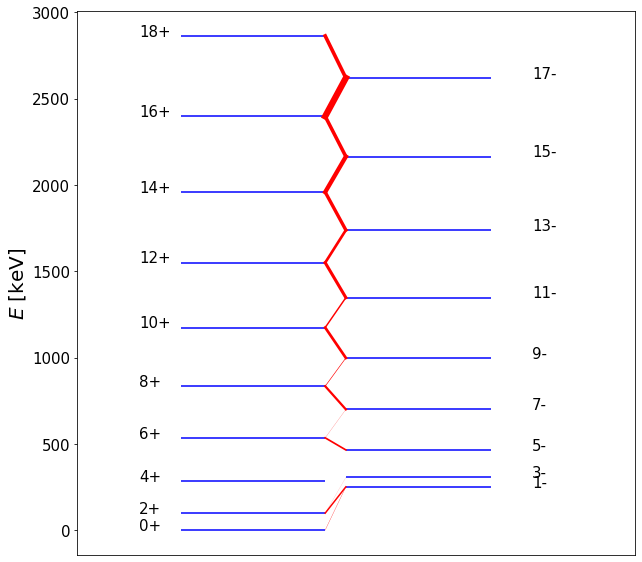

In [14]:
Plot()

## 6. Estimations of $B(E1)$ values $^{*}$

$^*$From experimental $D_0/Q_0$ and theoretical $B(E2)$

In [15]:
# EStimations from D0/Q0 static moments

#Weisskopf unit for B(E2) transitions 
WeisskopfUnitBE2 = 5.940*10**(-6)*224**(4/3)     # in e²b²

# =========================================================================================== 
# Function to compute B(E1) estimations
def expBE1(I, D0Q0, BE2):           # Arguments:  I: Angular momentum of initial state
                                    #             D0Q0: Experimental quotien between static dipole and static octupole moemnts
                                    #             BE2: Theoretical B(E2) in W.u "downwards" transition
    
    BE2_in_efm = BE2*WeisskopfUnitBE2*10**(4)       # Converts the B(E2) from W.u. to e²fm⁴
    return 16/5*(2*I-1)/(2*I-2)*D0Q0**2*BE2_in_efm/(WeisskopfUnitE1)

# Parameter of 224Th
# alpha2 = 0.0226   This value reported is a mistake
alpha2 = 0.1119164

# Upward transitions and coefficients
transitionsL = [[0,2],[2,4],[4,6],[6,8],[8,10],[10,12],[12,14],[14,16],[16,18],[1,3],[3,5],[5,7],[7,9],[9,11],[11,13],[13,15],[15,17]]
transitionsCoeff = [-0.44416453, -0.53034976, -0.55559007, -0.56696333, -0.57263782, -0.57524333, -0.57588854, -0.57512079, -0.57323958, -0.50504751, -0.54753201, -0.56416683, -0.57228994, -0.57634481, -0.57800193, -0.57802987, -0.57682975]

# Downwards transitions and coefficients
transitionsLDown = [[2,0],[4,2],[6,4],[8,6],[10,8],[12,10],[14,12],[16,14],[18,16],[3,1],[5,3],[7,5],[9,7],[11,9],[13,11],[15,13],[17,15]]
transitionsCoeffDown = [-0.99318207,-0.71153887, -0.66773616, -0.64834737, -0.63645135, -0.62764193, -0.62025094, -0.61350349, -0.60698793, -0.77147281, -0.68636770, -0.65880492, -0.64409107, -0.63411716, -0.62624930, -0.61936869, -0.61291582]

# SU(3) irreducible representations
transitionslammu = [[60,8],[60,8],[60,8],[60,8],[60,8],[60,8],[60,8],[60,8],[60,8],[65,6],[65,6],[65,6],[65,6],[65,6],[65,6],[65,6],[65,6]]

# Code for testing. Coefficients check. ==============================================
#for i in range(0, len(transitionsCoeff)):
#    print((transitionsCoeff[i]/transitionsCoeffDown[i])**2, "\t", (2*transitionsL[i][0]+1)/(2*transitionsL[i][1]+1))
# ====================================================================================

# Order 2 casimir of SU(3)
def C2(l,m):
    return l**2 + m**2 + l*m + 3.0*(l+m)

# Function to compute B(E2) transition according to Y. Sun et al., Nucl. Phys. A 106 545 (1968)
def BE2(Ii, If, Coeff, l, m):
    return (2.0*If + 1.0)/(2.0*Ii + 1.0)*alpha2*Coeff**2*C2(l,m)

### B(E2) values from PHYSICAL REVIEW C 101, 054306 (2020)

In [16]:
# Theoretical B(E2) values in W.u.
BE2_Th = []
BE2_Th_Inv = []

# Compute "downwards" transitions
print("Theoretical B(E2) values \n")
for i in range(0, len(transitionsCoeffDown)):
    
    be2 = BE2(transitionsLDown[i][0], transitionsLDown[i][1], transitionsCoeffDown[i], transitionslammu[i][0], transitionslammu[i][1])
    BE2_Th.append([be2, transitionsL[i][1]])
    print(transitionsLDown[i][0], "-->", transitionsLDown[i][1], "\t", be2, " W.u.")
    
# Compute "upwards" transitions
print("\n\nInverse \"upwards\" transition of theoretical B(E2) values \n")
for i in range(0, len(transitionsCoeffDown)):
    
    be2 = BE2(transitionsL[i][0], transitionsL[i][1], transitionsCoeff[i], transitionslammu[i][0], transitionslammu[i][1])
    BE2_Th_Inv.append([be2, transitionsL[i][1]])
    print(transitionsLDown[i][1], "-->", transitionsLDown[i][0], "\t", be2, " W.u.")
    

Theoretical B(E2) values 

2 --> 0 	 95.999949391166  W.u.
4 --> 2 	 136.86992258281845  W.u.
6 --> 4 	 150.20770647268498  W.u.
8 --> 6 	 156.42033264391569  W.u.
10 --> 8 	 159.56708741485434  W.u.
12 --> 10 	 161.02245793750407  W.u.
14 --> 12 	 161.3838754162672  W.u.
16 --> 14 	 160.9538615087802  W.u.
18 --> 16 	 159.90262504392814  W.u.
3 --> 1 	 138.85187905101438  W.u.
5 --> 3 	 163.19480450423538  W.u.
7 --> 5 	 173.2616284333165  W.u.
9 --> 7 	 178.2869321717756  W.u.
11 --> 9 	 180.82233571578635  W.u.
13 --> 11 	 181.8636389825832  W.u.
15 --> 13 	 181.88122186583803  W.u.
17 --> 15 	 181.12675634293154  W.u.


Inverse "upwards" transition of theoretical B(E2) values 

0 --> 2 	 479.99975881998773  W.u.
2 --> 4 	 246.3658600441295  W.u.
4 --> 6 	 216.9666883237352  W.u.
6 --> 8 	 204.54966726923195  W.u.
8 --> 10 	 197.11228660605718  W.u.
10 --> 12 	 191.69340183293025  W.u.
12 --> 14 	 187.20529529454166  W.u.
14 --> 16 	 183.154394582965  W.u.
16 --> 18 	 179.2847664034

### Estimations

In [17]:
# Arrays of data [L, D0/Q0, BE2]
exp = [[6,7.3*10**(-4), 150.20770647268498], [8, 6.7*10**(-4), 156.42033264391569],
       [10, 7.3*10**(-4), 159.56708741485434], [11,8.8*10**(-4), 180.82233571578635],
      [12, 8.4*10**(-4), 161.02245793750407], [13, 8.0*10**(-4), 181.8636389825832],
       [14, 9.3*10**(-4), 161.3838754162672], [15, 8.9*10**(-4), 181.88122186583803],
       [17, 10*10**(-4), 181.12675634293154]]

# Corresponding uncertainties
uncert = [[6,1.1*10**(-4), 150.20770647268498], [8, 0.7*10**(-4), 156.42033264391569],
       [10, 0.4*10**(-4), 159.56708741485434], [11,0.6*10**(-4), 180.82233571578635],
      [12, 0.4*10**(-4), 161.02245793750407], [13, 0.4*10**(-4), 181.8636389825832],
       [14, 0.5*10**(-4), 161.3838754162672], [15, 0.6*10**(-4), 181.88122186583803],
       [17, 1.3*10**(-4), 181.12675634293154]]

# Calculation of experimental estimates
print("B(E1) experimental estimation values \n")
for i in range(0, len(exp)):
    
    be1 = expBE1(exp[i][0], exp[i][1], exp[i][2])
    un = expBE1(uncert[i][0], uncert[i][1], uncert[i][2])
    print(exp[i][0], "-->", exp[i][0]-1, "\t", be1, " W.u.", "   +-   ", un, " W.u.")
    
print("\n\nB(E1) theoretical values \n")  
for i in transitions:
    
    print(i[0],r" --> ",i[1],"\t", BE1Ordered_Wu(i[0], i[1]), " W.u.")

B(E1) experimental estimation values 

6 --> 5 	 0.009576542814968983  W.u.    +-    0.00021744448876172785  W.u.
8 --> 7 	 0.008182465224881714  W.u.    +-    8.931628336360076e-05  W.u.
10 --> 9 	 0.009762212755787912  W.u.    +-    2.931045301043472e-05  W.u.
11 --> 10 	 0.015991339830368666  W.u.    +-    7.433990623621797e-05  W.u.
12 --> 11 	 0.01291898260108549  W.u.    +-    2.929474512717798e-05  W.u.
13 --> 12 	 0.013186597556580562  W.u.    +-    3.2966493891451414e-05  W.u.
14 --> 13 	 0.01576502224525045  W.u.    +-    4.5568916190456836e-05  W.u.
15 --> 14 	 0.016228783900176492  W.u.    +-    7.375788668177678e-05  W.u.
17 --> 16 	 0.020315368559112472  W.u.    +-    0.00034332972864900086  W.u.


B(E1) theoretical values 

1  -->  0 	 0.0010803047531031354  W.u.
1  -->  2 	 0.00589987288193826  W.u.
3  -->  2 	 0.0003453938526494087  W.u.
5  -->  4 	 3.915373955150503e-06  W.u.
6  -->  5 	 0.006857551746043871  W.u.
7  -->  6 	 0.0006301748485443456  W.u.
8  -->  7 	 0.

## 7. Experimental and theoretical $B(E1; J\rightarrow J-1)/B(E2; J\rightarrow J-2)$ ratios


 Experimental values:

B(E1;  6  ->  5 )/B(E2;  6  ->  4 ) =  6.37553361265819e-05  +-  1.447625383996325e-06
B(E1;  8  ->  7 )/B(E2;  8  ->  6 ) =  5.2310751975631915e-05  +-  5.710017480075658e-07
B(E1;  10  ->  9 )/B(E2;  10  ->  8 ) =  6.117936294975032e-05  +-  1.8368733480878315e-07
B(E1;  11  ->  10 )/B(E2;  11  ->  9 ) =  8.843675073141184e-05  +-  4.1112125856544754e-07
B(E1;  12  ->  11 )/B(E2;  12  ->  10 ) =  8.023093652004491e-05  +-  1.819295612699431e-07
B(E1;  13  ->  12 )/B(E2;  13  ->  11 ) =  7.250815847715125e-05  +-  1.812703961928781e-07
B(E1;  14  ->  13 )/B(E2;  14  ->  12 ) =  9.768647706957574e-05  +-  2.823635017619832e-07
B(E1;  15  ->  14 )/B(E2;  15  ->  13 ) =  8.922737451229252e-05  +-  4.05527772054353e-07
B(E1;  17  ->  16 )/B(E2;  17  ->  15 ) =  0.0001121610576443433  +-  1.8955218741894023e-06

 Theoretical values:

B(E1;  3  ->  2 )/B(E2;  3  ->  1 ) =  2.487498584894991e-06
B(E1;  5  ->  4 )/B(E2;  5  ->  3 ) =  2.399202576972288e-08
B(E1;  6  ->

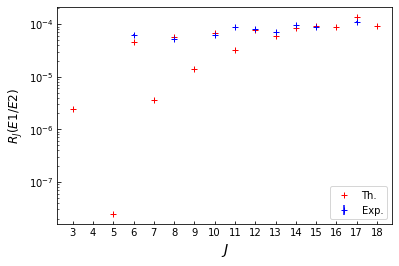

In [21]:
# ====================================================================================
# Function to compute the B(E1; J --> J-1)/B(E2; J --> J-2) ratios in 1/fm²
def expBE1toBE2(J, D0toQ0):
    return (16/5)*((2*J-1)/(2*J-2))*(D0toQ0)**2  

# ====================================================================================
# Function to compute the B(E1; J --> J-1)/B(E2; J --> J-2) in in W.u
def expBE1toBE2inWu(J, D0toQ0):
    WeisskopfUnitBE2 = 5.940*10**(-6)*224**(4/3)*10**4                   # in e²fm⁴
    WeisskopfUnitBE1 = 6.446*10**(-4)*224**(2/3)*10**2                   # in e²fm²
    return expBE1toBE2(J, D0toQ0)*(WeisskopfUnitBE2/WeisskopfUnitBE1)

# ====================================================================================
# Function to print all B(E1)/BE2 ratios in W.u
def printRatios():
    print("\n Experimental values:\n")
    for i in range(len(exp)):
        print("B(E1; ",exp[i][0]," -> ",exp[i][0]-1,")/B(E2; ",exp[i][0]," -> ",exp[i][0]-2,") = "
              ,expBE1toBE2inWu(exp[i][0], exp[i][1]), " +- ", expBE1toBE2inWu(uncert[i][0], uncert[i][1]))

# ====================================================================================
# Function to print theoretical B(E1)/BE2 ratios in W.u.
def printTheoreticalRatios():
    print("\n Theoretical values:\n")
    for i in BE1_Th:
        for j in BE2_Th:
            if (i[1] == j[1]):
                print("B(E1; ",i[1]," -> ",i[1]-1,")/B(E2; ",i[1]," -> ",i[1]-2,") = ", i[0]/j[0])
        
printRatios()
printTheoreticalRatios()

# ====================================================================================
# Experimental data
ExpData = [6.37553361265819e-05,5.2310751975631915e-05,6.117936294975032e-05,8.843675073141184e-05,8.023093652004491e-05 ,7.250815847715125e-05 ,9.768647706957574e-05 ,8.922737451229252e-05 ,0.0001121610576443433]
ExpDataError = [1.447625383996325e-06,5.710017480075658e-07,1.8368733480878315e-07,4.1112125856544754e-07,1.819295612699431e-07,1.812703961928781e-07,2.823635017619832e-07,4.05527772054353e-07,1.8955218741894023e-06]
J1 = [6,8,10,11,12,13,14,15,17]

# Theoretical data
J2 = [ 3, 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
transitions = np.array([[3,2], [5,4], [6,5], [7,6], [8,7], [9,8], [10,9], [11,10], [12,11], [13,12], [14, 13], [15,14], [16,15], [17,16], [18,17]])
ThData = RBE1BE2_to_Fit(transitions.transpose(), a, b)
ThDataT = RBE1BE2_to_Fit(J.transpose(), a, b)

#plot
plt.errorbar(J1,ExpData, yerr = ExpDataError, fmt ='+', color = "blue", label="Exp.")
plt.plot(J2, ThData, "+", color = "red", label="Th.")
#plt.plot(J1, ThDataT, ".", color = "green")

#plt.title(r"Experimental and theoretical $R_{J_i}(E1/E2)$")
plt.ylabel(r"$R_{J}(E1/E2)$", size="large", fontfamily="monospace")
plt.xlabel(r"$J$", size="x-large", fontfamily="monospace")
plt.xticks(np.arange(3,19,1))
plt.yscale("log")
plt.legend(loc="lower right")
plt.tick_params(axis="x", direction="in")
plt.tick_params(axis="y", direction="in")
plt.tick_params(axis="y", which="minor",direction="in")
plt.savefig('RE1E2.png', format='png', dpi=1200)
plt.show()

## 8. Reduced matrix elements ratios

< 0 ||TE1|| 1 >/< 0 ||TE1|| 1 > =  1.0
< 1 ||TE1|| 2 >/< 0 ||TE1|| 1 > =  1.0451128357066168
< 2 ||TE1|| 3 >/< 0 ||TE1|| 1 > =  0.3862669486670214
< 3 ||TE1|| 4 >/< 0 ||TE1|| 1 > =  1.345415862520438
< 4 ||TE1|| 5 >/< 0 ||TE1|| 1 > =  0.03842624441828249
< 5 ||TE1|| 6 >/< 0 ||TE1|| 1 > =  1.581343105621042
< 6 ||TE1|| 7 >/< 0 ||TE1|| 1 > =  0.47366436778259563
< 7 ||TE1|| 8 >/< 0 ||TE1|| 1 > =  1.7711942895815846
< 8 ||TE1|| 9 >/< 0 ||TE1|| 1 > =  0.9288617482824167
< 9 ||TE1|| 10 >/< 0 ||TE1|| 1 > =  1.9203286869436411
< 10 ||TE1|| 11 >/< 0 ||TE1|| 1 > =  1.4018858402435972
< 11 ||TE1|| 12 >/< 0 ||TE1|| 1 > =  2.0321659324082133
< 12 ||TE1|| 13 >/< 0 ||TE1|| 1 > =  1.8875469111110548
< 13 ||TE1|| 14 >/< 0 ||TE1|| 1 > =  2.109890411481851
< 14 ||TE1|| 15 >/< 0 ||TE1|| 1 > =  2.3792101926729576
< 15 ||TE1|| 16 >/< 0 ||TE1|| 1 > =  2.156814534259392
< 16 ||TE1|| 17 >/< 0 ||TE1|| 1 > =  2.869355797039474
< 17 ||TE1|| 18 >/< 0 ||TE1|| 1 > =  2.176415589041189


< 0 ||TE2|| 2 >/ < 0 ||TE2||

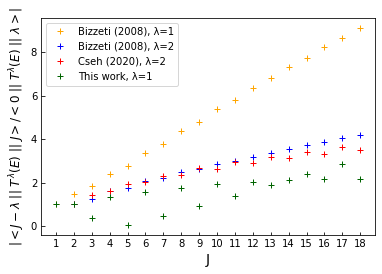

In [19]:
# Reduced matrix elements ratios 
# Dipole transitions <J-1||TE1||J>/<0||TE1||1>
for i in range(1, 19):
    if (i%2 == 0): 
        print("<",i-1,"||TE1||",i,">/< 0 ||TE1|| 1 > = ", abs(TE1_RME(i-1, i)/TE1_RME(1, 0)))
    else:
        print("<",i-1,"||TE1||",i,">/< 0 ||TE1|| 1 > = ", abs(TE1_RME(i, i-1)/TE1_RME(1, 0)))

# Quadrupole transitions <J-2||TE1||J>/<0||TE1||2>
print("\n")
for i in BE2_Th:
    print("<",i[1]-2,"||TE2||",i[1],">/ < 0 ||TE2|| 2 > = ", np.sqrt(i[0]*(2*i[1]-1))/np.sqrt(95.999949391166*(2*2-1)))
    
#==============================================================================
# Plot

# Matrix elements from PHYSICAL REVIEW C 77, 024320 (2008) 
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],[1,1.50,1.87,2.41,2.76,3.38,3.76,4.39, 4.80, 5.39, 5.82, 6.35, 6.80, 7.30, 7.75, 8.22, 8.67, 9.12], "+", color = "orange", label="Bizzeti (2008), λ=1")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

# Matrix elements from PHYSICAL REVIEW C 77, 024320 (2008) 
plt.plot([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],[1,1.27, 1.63,1.78, 2.09, 2.21, 2.48, 2.61, 2.84, 2.99, 3.20, 3.36, 3.54,  3.71, 3.88, 4.05, 4.21], "+", color = "blue", label="Bizzeti (2008), λ=2")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

# Qudrupole transitions plot
for i in BE2_Th:
    if i[1] == 2:
        plt.plot(i[1], np.sqrt(i[0]*(2*i[1]+1))/np.sqrt(95.999949391166*(2*2+1)), "+", color = "red", label="Cseh (2020), λ=2")
    else:
        plt.plot(i[1], np.sqrt(i[0]*(2*i[1]+1))/np.sqrt(95.999949391166*(2*2+1)), "+", color = "red")

# Dipole transitions plot
for i in range(1, 19):
    if (i%2 == 0): 
        if i == 2:
            plt.plot(i,abs(TE1_RME(i-1, i)/TE1_RME(1, 0)),"+", color = "darkgreen", label="This work, λ=1")
        else:
            plt.plot(i,abs(TE1_RME(i-1, i)/TE1_RME(1, 0)),"+", color = "darkgreen")
    else:
        plt.plot(i,abs(TE1_RME(i, i-1)/TE1_RME(1, 0)),"+", color = "darkgreen")

plt.ylabel(r"$|<$$J-\lambda$ $||$ $T^\lambda(E)$ $||$ $J$$>/<$$0$ $||$ $T^\lambda(E)$ $||$ $\lambda$$>|$", size="large")
plt.xlabel("J", size="x-large")
plt.tick_params(axis="x", direction="in")
plt.tick_params(axis="y", direction="in")
plt.legend()
plt.savefig('Matrix_Element_Ratios.png', format='png', dpi=1200)
plt.show()

< 0 ||TE1|| 1 > =  0.08777986882322984
< 1 ||TE1|| 2 > =  -0.0917398676238006
< 2 ||TE1|| 3 > =  0.033906462084740394
< 3 ||TE1|| 4 > =  -0.11810042792473668
< 4 ||TE1|| 5 > =  -0.003373050694406205
< 5 ||TE1|| 6 > =  -0.13881009037593398
< 6 ||TE1|| 7 > =  -0.04157819607019434
< 7 ||TE1|| 8 > =  -0.15547520239992527
< 8 ||TE1|| 9 > =  -0.08153536241914648
< 9 ||TE1|| 10 > =  -0.16856620023739802
< 10 ||TE1|| 11 > =  -0.1230573551617263
< 11 ||TE1|| 12 > =  -0.17838325897382953
< 12 ||TE1|| 13 > =  -0.16568862025502107
< 13 ||TE1|| 14 > =  -0.18520590355126731
< 14 ||TE1|| 15 > =  -0.20884675861572363
< 15 ||TE1|| 16 > =  -0.18932489689332502
< 16 ||TE1|| 17 > =  -0.25187167547129913
< 17 ||TE1|| 18 > =  -0.1910454749108681


< 0 ||TE2|| 2 > =  21.90889652528922
< 2 ||TE2|| 4 > =  35.09742587776724
< 4 ||TE2|| 6 > =  44.18936732003418
< 6 ||TE2|| 8 > =  51.56690464771535
< 8 ||TE2|| 10 > =  57.88703512628662
< 10 ||TE2|| 12 > =  63.44731238151544
< 12 ||TE2|| 14 > =  68.41149309196335


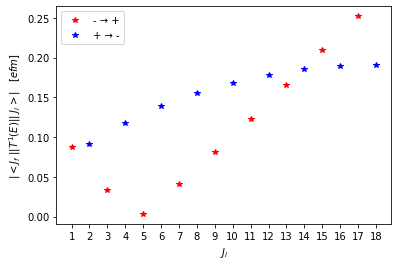

In [20]:
# Reduced matrix elements
# Dipole transitions <J-1||TE1||J>
for i in range(1, 19):
    if (i%2 == 0): 
        print("<",i-1,"||TE1||",i,"> = ", TE1_RME(i-1, i))
        plt.plot(i, abs(TE1_RME(i-1, i)), "*", color = "blue")
    else:
        print("<",i-1,"||TE1||",i,"> = ", TE1_RME(i, i-1))
        plt.plot(i, abs(TE1_RME(i, i-1)), "*", color = "red")

# Quadrupole transitions <J-2||TE1||J>
print("\n")
for i in BE2_Th:
    print("<",i[1]-2,"||TE2||",i[1],"> = ", np.sqrt(i[0]*(2*i[1]+1)))

# Plot format
plt.legend([ "- → +", "+ → -"], loc="upper left")
plt.ylabel(r"$|<J_f$ $||T^1(E)||$ $J_i>|$   $[efm]$")
plt.xlabel(r"$J_i$")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.plot()
plt.show()